# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Exploratory Data Analysis](#ExploratoryDataAnalysis)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction : Business Problem <a name="introduction"></a>

 Living in a big city provides a number of options in terms of neighbourhood choices. When selecting a neighbourhood to live in a person might have number of considerations, including rental costs, housing prices, transportation , walkability, restaurants in neighbourhood, Gyms, running routes etc. 
 
If someone is relocating from one city to another while they might have a good idea of neighbourhoods in one city they might be unfamiliar with the neighbourhoods in another city. In this case study we are going to look at neighbourhoods in Manhattan and compare them with neighbour hoods in Toronto. So given a neighbourhood preference for a person who lives New york we will try to find similar neighbourhoods in the city of Toronto.

While the intention for this Capstone project is only to do this for two sample cities, this can easily be extended to add additional cities for comparison.

## 2. Data <a name="data"></a>

To group neighbourhoods into different categories and find comparable neighbourhoods from the other city, we can use the data from foursquae API to find venues type and number of venues in each neighbourhood.

 
The aim is to use as much useful information and come up with different neighbourhood clusters in each city and find similar neighbourhoods in the other city.


### Before downloading Data let us download all necessary dependencies

In [231]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

#Display all columns and rows in Jupyter output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#prints all outputs in Jupyter Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Import New york Location Data into a panda

In [2]:
with open(r'C:\Users\rrvin\OneDrive\Desktop\Data Science\Coursera\Datascience Capstone Project\nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.

In [3]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [4]:
ny_neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [5]:
ny_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [7]:
ny_neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.

In [8]:
for data in ny_neighborhoods_data:
    borough = ny_neighborhood_name = data['properties']['borough'] 
    ny_neighborhood_name = data['properties']['name']
        
    ny_neighborhood_latlon = data['geometry']['coordinates']
    ny_neighborhood_lat = ny_neighborhood_latlon[1]
    ny_neighborhood_lon = ny_neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': ny_neighborhood_name,
                                          'Latitude': ny_neighborhood_lat,
                                          'Longitude': ny_neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [9]:
ny_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_neighborhoods['Borough'].unique()),
        ny_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, ny_neighborhood in zip(ny_neighborhoods['Latitude'], ny_neighborhoods['Longitude'], ny_neighborhoods['Borough'], ny_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(ny_neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [13]:
# manhattan_data = ny_neighborhoods[ny_neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
# manhattan_data.head()

Let's get the geographical coordinates of Manhattan.

In [14]:
# address = 'Manhattan, NY'

# geolocator = Nominatim(user_agent="ny_explorer")
# location = geolocator.geocode(address)
# latitude = location.latitude
# longitude = location.longitude
# print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [15]:
# # create map of Manhattan using latitude and longitude values
# map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# # add markers to map
# for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
#     label = folium.Popup(label, parse_html=True)
#     folium.CircleMarker(
#         [lat, lng],
#         radius=5,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_manhattan)  
    
# map_manhattan

## Now lets similarly Import Toronto Neighborhood Data

## Scraping data from wikipedia and creating the data frame.

Import code from the following Wikipedia Page:
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [16]:
#Scraping the webpage with pandas
dfs=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',header=0)
df_PostalCodesCanada=dfs[0]
# Change Neighbourhood spelling from Candadian english to American English
df_PostalCodesCanada=df_PostalCodesCanada.rename(columns={'Neighbourhood':'Neighborhood'}) 
df_PostalCodesCanada.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

Note the dataframe is already imported with only one row per postal code with neighbourhoods combined into one.
Replace the forward slashes with commas

In [17]:
df_PostalCodesCanada=df_PostalCodesCanada.replace('/',',',regex=True)
df_PostalCodesCanada.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

Count the Number of Borough with Not Assigned and drop them from the data frame

In [18]:
print('Size of dataframe before removing Not assigned Boroughs:',df_PostalCodesCanada.shape)
print('Number of Not assigned Boroughs:',df_PostalCodesCanada.Borough.value_counts()['Not assigned'])
df_PostalCodesCanada=df_PostalCodesCanada[~df_PostalCodesCanada.Borough.str.contains('Not assigned')]
print('Size of dataframe after removing Not assigned Boroughs:',df_PostalCodesCanada.shape)  
df_PostalCodesCanada=df_PostalCodesCanada.reset_index(drop=True)
df_PostalCodesCanada.head()

Size of dataframe before removing Not assigned Boroughs: (180, 3)
Number of Not assigned Boroughs: 77
Size of dataframe after removing Not assigned Boroughs: (103, 3)


Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

Find Neighbourhoods that contain Not assigned.

In [19]:
df_PostalCodesCanada[df_PostalCodesCanada.Neighborhood.str.contains('Not assigned')]


Empty DataFrame
Columns: [Postal Code, Borough, Neighborhood]
Index: []

There are no Neighbourhoods that are not assigned.
Below shows the first five columns of the final dataframe

In [20]:
df_PostalCodesCanada.head()
print( 'Size of dataframe after processing:',df_PostalCodesCanada.shape)

Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

Size of dataframe after processing: (103, 3)


## Get Latitude and Longitude information for each neighbourhood

In [21]:
df_PostalCodesCanada.head()

Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

# Import latitude Longitude data from csv file

In [22]:

lat_lng_coords=pd.read_csv('C:/Users/rrvin/OneDrive/Desktop/Data Science/Coursera/Datascience Capstone Project/Canada_Geospatial_Coordinates.csv')
print(lat_lng_coords.shape)
lat_lng_coords.head()

(103, 3)


Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

# Merge the two data frames to create a single dataframe

In [23]:
df_Postcodes_WithLatLng=pd.merge(df_PostalCodesCanada,lat_lng_coords, on='Postal Code')
print(df_Postcodes_WithLatLng.shape)
df_Postcodes_WithLatLng.head()


(103, 5)


Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

## Exploring and clustering neighbourhoods in toronto. 
Tasks to complete  
  1) Add enough Markdown cells to explain what you decided to do and to report any observations you make.   
  2) to generate maps to visualize your neighborhoods and how they cluster together.  

## Use geopy to get the latitude longitude of tornonto

In [24]:
address='Toronto, Ontario'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronot are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronot are 43.6534817, -79.3839347.


## Create a new data frame for all Tonronto neighbourhoods

In [25]:
# df_toronto=df_Postcodes_WithLatLng[df_Postcodes_WithLatLng.Borough.str.contains('Toronto')].reset_index(drop=True)
# print(df_toronto.shape)
df_toronto=df_Postcodes_WithLatLng
print(df_toronto.shape)
df_toronto.head()


(103, 5)


Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

## Create a map of Toronoto 

In [26]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

 ## 3. Exploratory Data Analysis <a name="ExploratoryDataAnalysis"></a>

Lets look at the number of neighbhourhoods we have in Manhattan and Toronto in our dataframes and the size of the dataframes.

In [27]:
print(ny_neighborhoods.shape)
ny_neighborhoods.head()

(306, 4)


Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [28]:
print(df_toronto.shape)
df_toronto.head()

(103, 5)


Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

Both Dataframes have similar number of neighbourhoods but the Toronto dataframe also has Postal code information.
Lets remove the Postal Code information and combine the dataframe for the two cities. This is to enable us to run our clustering algorithm for the neighbourhoods on both cities to find the most similar neighbourhoods.

In [29]:
df_toronto=df_toronto.drop('Postal Code', axis=1)
print(df_toronto.shape)
df_toronto.head()

(103, 4)


Borough                                 Neighborhood   Latitude  \
0        North York                                    Parkwoods  43.753259   
1        North York                             Victoria Village  43.725882   
2  Downtown Toronto                    Regent Park, Harbourfront  43.654260   
3        North York             Lawrence Manor, Lawrence Heights  43.718518   
4  Downtown Toronto  Queen's Park, Ontario Provincial Government  43.662301   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494

In [30]:
Toronto_Boroughs=df_toronto['Borough'].unique()
print(Toronto_Boroughs)
type(Toronto_Boroughs)


['North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough' 'East York'
 'York' 'East Toronto' 'West Toronto' 'Central Toronto' 'Mississauga']


numpy.ndarray

In [31]:
df_toronto.insert(0,'City','Toronto')
print(df_toronto.head())


      City           Borough                                 Neighborhood  \
0  Toronto        North York                                    Parkwoods   
1  Toronto        North York                             Victoria Village   
2  Toronto  Downtown Toronto                    Regent Park, Harbourfront   
3  Toronto        North York             Lawrence Manor, Lawrence Heights   
4  Toronto  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494  


In [32]:
ny_neighborhoods.insert(0,'City','New York')
print(ny_neighborhoods.head())

       City Borough Neighborhood   Latitude  Longitude
0  New York   Bronx    Wakefield  40.894705 -73.847201
1  New York   Bronx   Co-op City  40.874294 -73.829939
2  New York   Bronx  Eastchester  40.887556 -73.827806
3  New York   Bronx    Fieldston  40.895437 -73.905643
4  New York   Bronx    Riverdale  40.890834 -73.912585


In [33]:
df_Combined=pd.concat([df_toronto,ny_neighborhoods],axis=0,ignore_index=True)
print(df_Combined.shape)
df_Combined

(409, 5)


City           Borough  \
0     Toronto        North York   
1     Toronto        North York   
2     Toronto  Downtown Toronto   
3     Toronto        North York   
4     Toronto  Downtown Toronto   
5     Toronto         Etobicoke   
6     Toronto       Scarborough   
7     Toronto        North York   
8     Toronto         East York   
9     Toronto  Downtown Toronto   
10    Toronto        North York   
11    Toronto         Etobicoke   
12    Toronto       Scarborough   
13    Toronto        North York   
14    Toronto         East York   
15    Toronto  Downtown Toronto   
16    Toronto              York   
17    Toronto         Etobicoke   
18    Toronto       Scarborough   
19    Toronto      East Toronto   
20    Toronto  Downtown Toronto   
21    Toronto              York   
22    Toronto       Scarborough   
23    Toronto         East York   
24    Toronto  Downtown Toronto   
25    Toronto  Downtown Toronto   
26    Toronto       Scarborough   
27    Toronto        North York   
28    Toronto        North York   
29    Toronto         East York   
30    Toronto  Downtown Toronto   
31    Toronto      West Toronto   
32    Toronto       Scarborough   
33    Toronto        North York   
34    Toronto        North York   
35    Toronto         East York   
36    Toronto  Downtown Toronto   
37    Toronto      West Toronto   
38    Toronto       Scarborough   
39    Toronto        North York   
40    Toronto        North York   
41    Toronto      East Toronto   
42    Toronto  Downtown Toronto   
43    Toronto      West Toronto   
44    Toronto       Scarborough   
45    Toronto        North York   
46    Toronto        North York   
47    Toronto      East Toronto   
48    Toronto  Downtown Toronto   
49    Toronto        North York   
50    Toronto        North York   
51    Toronto       Scarborough   
52    Toronto        North York   
53    Toronto        North York   
54    Toronto      East Toronto   
55    Toronto        North York   
56    Toronto              York   
57    Toronto        North York   
58    Toronto       Scarborough   
59    Toronto        North York   
60    Toronto        North York   
61    Toronto   Central Toronto   
62    Toronto   Central Toronto   
63    Toronto              York   
64    Toronto              York   
65    Toronto       Scarborough   
66    Toronto        North York   
67    Toronto   Central Toronto   
68    Toronto   Central Toronto   
69    Toronto      West Toronto   
70    Toronto         Etobicoke   
71    Toronto       Scarborough   
72    Toronto        North York   
73    Toronto   Central Toronto   
74    Toronto   Central Toronto   
75    Toronto      West Toronto   
76    Toronto       Mississauga   
77    Toronto         Etobicoke   
78    Toronto       Scarborough   
79    Toronto   Central Toronto   
80    Toronto  Downtown Toronto   
81    Toronto      West Toronto   
82    Toronto       Scarborough   
83    Toronto   Central Toronto   
84    Toronto  Downtown Toronto   
85    Toronto       Scarborough   
86    Toronto   Central Toronto   
87    Toronto  Downtown Toronto   
88    Toronto         Etobicoke   
89    Toronto         Etobicoke   
90    Toronto       Scarborough   
91    Toronto  Downtown Toronto   
92    Toronto  Downtown Toronto   
93    Toronto         Etobicoke   
94    Toronto         Etobicoke   
95    Toronto       Scarborough   
96    Toronto  Downtown Toronto   
97    Toronto  Downtown Toronto   
98    Toronto         Etobicoke   
99    Toronto  Downtown Toronto   
100   Toronto      East Toronto   
101   Toronto         Etobicoke   
102   Toronto         Etobicoke   
103  New York             Bronx   
104  New York             Bronx   
105  New York             Bronx   
106  New York             Bronx   
107  New York             Bronx   
108  New York             Bronx   
109  New York         Manhattan   
110  New York             Bronx   
111  New York             Bronx   
112  New York             Bronx   
113  New York      

In [34]:
# df_Combined.to_csv('df_Combined.csv')

## Define Foursquare credentials

In [35]:
CLIENT_ID = '0ICLA33YPBNHVYNVYIIAUMZMDZNCLNV2T1BQIP5L4DNB3LEU' # your Foursquare ID
CLIENT_SECRET = 'OH5S0CYINXYPJA1J0LBDFYZN3UD2D1CXLFET3XS2JVUFWIT0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 0ICLA33YPBNHVYNVYIIAUMZMDZNCLNV2T1BQIP5L4DNB3LEU
CLIENT_SECRET:OH5S0CYINXYPJA1J0LBDFYZN3UD2D1CXLFET3XS2JVUFWIT0


## Function to extract neighbourhood Venue information for all the neighbourhoods

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        result=requests.get(url).json()
        print(result)
        results =result["response"]["groups"][0]["items"]
                
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['icon'] ) for v in results])
 

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Icon']
    
    return(nearby_venues)

In [37]:
# Combined_venues = getNearbyVenues(names=df_Combined['Neighborhood'],
#                                    latitudes=df_Combined['Latitude'],
#                                    longitudes=df_Combined['Longitude']
#                                   )

### Lets check the size of the venues dataframe

In [38]:
#   Save to CSV so we can start from here next time
# Combined_venues.to_csv('Combined_venues.csv')
Combined_venues=pd.read_csv('Combined_venues.csv')
print(Combined_venues.shape)
print(Combined_venues.head())

(12089, 8)
   Unnamed: 0      Neighborhood  Neighborhood Latitude  \
0           0         Parkwoods              43.753259   
1           1         Parkwoods              43.753259   
2           2         Parkwoods              43.753259   
3           3  Victoria Village              43.725882   
4           4  Victoria Village              43.725882   

   Neighborhood Longitude                   Venue  Venue Latitude  \
0              -79.329656         Brookbanks Park       43.751976   
1              -79.329656         GTA Restoration       43.753396   
2              -79.329656           Variety Store       43.751974   
3              -79.315572  Victoria Village Arena       43.723481   
4              -79.315572             Tim Hortons       43.725517   

   Venue Longitude     Venue Category  
0       -79.332140               Park  
1       -79.333477    Fireworks Store  
2       -79.333114  Food & Drink Shop  
3       -79.315635       Hockey Arena  
4       -79.313103       

In [39]:
Combined_venues=Combined_venues.drop('Unnamed: 0', axis=1)
Combined_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude     Venue Category  
0         Brookbanks Park       43.751976       -79.332140               Park  
1         GTA Restoration       43.753396       -79.333477    Fireworks Store  
2           Variety Store       43.751974       -79.333114  Food & Drink Shop  
3  Victoria Village Arena       43.723481       -79.315635       Hockey Arena  
4             Tim Hortons       43.725517       -79.313103        Coffee Shop

Lets check how many venues were returned for each neighbourhood

In [40]:
Combined_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               5   
Alderwood, Long Branch                                                  9   
Allerton                                                               26   
Annadale                                                               14   
Arden Heights                                                           4   
Arlington                                                               8   
Arrochar                                                               18   
Arverne                                                                19   
Astoria                                                               100   
Astoria Heights                                                        15   
Auburndale                                                             19   
Bath Beach                                                             46   
Bathurst Manor, Wilson Heights, Downsview North                        20   
Battery Park City                                                      65   
Bay Ridge                                                              83   
Bay Terrace                                                            48   
Baychester                                                             18   
Bayside                                                                77   
Bayswater                                                               2   
Bayview Village                                                         4   
Bedford Park                                                           37   
Bedford Park, Lawrence Manor East                                      24   
Bedford Stuyvesant                                                     29   
Beechhurst                                                             16   
Bellaire                                                               12   
Belle Harbor                                                           16   
Bellerose                                                              21   
Belmont                                                                95   
Bensonhurst                                                            31   
Berczy Park                                                            56   
Bergen Beach                                                            5   
Birch Cliff, Cliffside West                                             4   
Blissville                                                             15   
Bloomfield                                                              4   
Boerum Hill                                                            91   
Borough Park                                                           22   
Breezy Point                                                            4   
Briarwood                                                               9   
Brighton Beach                                                         44   
Broad Channel                                                           5   
Broadway Junction                                                      17   
Brockton, Parkdale Village, Exhibition Place                           23   
Bronxdale                                                              13   
Brooklyn Heights                                                      100   
Brookville                                                              1   
Brownsville                                                            16   
Bulls Head                                                             45   
Bushwick                                                               73   
Business reply mail Processing Centre, South Ce...                     16   
Butler Manor                                                            6   
CN Tower, King and Spadina, Railway Lands, Harb.

#### Let's find out how many unique categories can be curated from all the returned venues

In [41]:
print('There are {} uniques categories.'.format(len(Combined_venues['Venue Category'].unique())))
print(Combined_venues['Venue Category'].unique())

There are 463 uniques categories.
['Park' 'Fireworks Store' 'Food & Drink Shop' 'Hockey Arena' 'Coffee Shop'
 'Portuguese Restaurant' 'Grocery Store' 'Bakery' 'Breakfast Spot'
 'Distribution Center' 'Spa' 'Restaurant' 'Gym / Fitness Center'
 'Historic Site' 'Farmers Market' 'Chocolate Shop' 'Pub'
 'Performing Arts Venue' 'Dessert Shop' 'French Restaurant' 'Yoga Studio'
 'Café' 'Theater' 'Event Space' 'Ice Cream Shop' 'Shoe Store'
 'Art Gallery' 'Cosmetics Shop' 'Bank' 'Electronics Store' 'Beer Store'
 'Hotel' 'Health Food Store' 'Wine Shop' 'Antique Shop' 'Boutique'
 'Furniture / Home Store' 'Vietnamese Restaurant' 'Clothing Store'
 'Accessories Store' 'Gift Shop' 'Miscellaneous Shop' 'Sushi Restaurant'
 'Italian Restaurant' 'Creperie' 'Mexican Restaurant' 'Beer Bar'
 'Arts & Crafts Store' 'Burrito Place' 'Hobby Shop' 'Diner'
 'Fried Chicken Joint' 'Discount Store' 'Wings Joint' 'Smoothie Shop'
 'Sandwich Place' 'Gym' 'Bar' 'College Auditorium' 'Music Venue'
 'Fast Food Restaurant' 'Ca

## Adding Top Level Category

There number of unique venue types are very high. FourSquare uses a Category hierarchy with all venues falling into one of the following:
1. Arts & Entertainment
2. College & University
3. Event
4. Food
5. Nightlife Spot
6. Outdoors & Recreation
7. Professional & Other Places
8. Residence 
9. Shop & Service
10. Travel & Transport

Using these top level Categories will better help us in segregating neighborhoods which might otherwise be dominated by one category.

Foursquare provides their Category Hierarchy at the following URL: https://developer.foursquare.com/docs/build-with-foursquare/categories/  We will use Beautiful soup to do some web scraping and create a Panda Data frame with the category structure.

## Using Beautiful soup to create a dataframe with Category type hierarchy for venue data from foursquare

In [42]:
# Import the necessary libraries
from bs4 import BeautifulSoup
import requests

Create Soup object from the websites html

In [43]:
url='https://developer.foursquare.com/docs/build-with-foursquare/categories/'
page =requests.get(url)
# Create a BeautifulSoup object
soup = BeautifulSoup(page.text, 'lxml')

Take a quick look at html thats been imported into the notebook

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <style data-href="/docs/styles.9c58dbf9f1c0b90f47bc.css">
   code[class*=language-],pre[class*=language-]{background-color:#eef1f9;border-radius:5px;color:#393a34;direction:ltr;text-align:left;white-space:pre;word-spacing:normal;word-break:normal;font-size:13px;line-height:1.45;-moz-tab-size:4;-o-tab-size:4;tab-size:4;-webkit-hyphens:none;-ms-hyphens:none;hyphens:none}code[class*=language-]::selection,code[class*=language-] ::selection,pre[class*=language-]::selection,pre[class*=language-] ::selection{background:#c1def1}pre[class*=language-]{margin:0 0 32px;padding:20px 24px;overflow:auto}:not(pre)>code[class*=language-]{display:inline-block;margin-bottom:0;padding:1px .2em;border-radius:3px;border:1px solid #ddd;white-space:normal;word-break:break-word;vertical-align:middle;font-wei
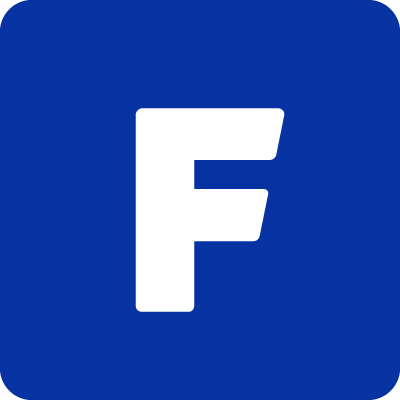

In [44]:
print(soup.prettify())

### Let's Creata a data frame which holds the category type hierarchy.

After inspecting the html we find all categories are under h3 headings.Lets create a list with all the Categories.

In [45]:
# Find all categories in h3 headings.
Categories=soup.findAll('h3',text=True)

# Initialize a list of Categories
Categories_list=[]

for x in range(len(Categories)):
    Categories_list.append(Categories[x].text);
    
Categories_list


['Arts & Entertainment',
 'Amphitheater',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Bowling Alley',
 'Casino',
 'Circus',
 'Comedy Club',
 'Concert Hall',
 'Country Dance Club',
 'Disc Golf',
 'Exhibit',
 'General Entertainment',
 'Go Kart Track',
 'Historic Site',
 'Karaoke Box',
 'Laser Tag',
 'Memorial Site',
 'Mini Golf',
 'Movie Theater',
 'Drive-in Theater',
 'Indie Movie Theater',
 'Multiplex',
 'Museum',
 'Art Museum',
 'Erotic Museum',
 'History Museum',
 'Planetarium',
 'Science Museum',
 'Music Venue',
 'Jazz Club',
 'Piano Bar',
 'Rock Club',
 'Pachinko Parlor',
 'Performing Arts Venue',
 'Dance Studio',
 'Indie Theater',
 'Opera House',
 'Theater',
 'Pool Hall',
 'Public Art',
 'Outdoor Sculpture',
 'Street Art',
 'Racecourse',
 'Racetrack',
 'Roller Rink',
 'Salsa Club',
 'Samba School',
 'Stadium',
 'Baseball Stadium',
 'Basketball Stadium',
 'Cricket Ground',
 'Football Stadium',
 'Hockey Arena',
 'Rugby Stadium',
 'Soccer Stadium',
 'Tennis Stadium',
 'Track Stadium',


In [46]:
# Create a dataframe with the Categories list as the index withplace holders for Parent and top level category.
# Inspecting the Category hierarchy web page shows the deepest level is 4 for Latin American restaurants under food.
CategoryType=pd.DataFrame(index=Categories_list,columns=['Level 1 Parent Category','Level 2 Parent Category','Level 3 Parent Category','Top Level Category'])
CategoryType

Level 1 Parent Category  \
Arts & Entertainment                                         NaN   
Amphitheater                                                 NaN   
Aquarium                                                     NaN   
Arcade                                                       NaN   
Art Gallery                                                  NaN   
Bowling Alley                                                NaN   
Casino                                                       NaN   
Circus                                                       NaN   
Comedy Club                                                  NaN   
Concert Hall                                                 NaN   
Country Dance Club                                           NaN   
Disc Golf                                                    NaN   
Exhibit                                                      NaN   
General Entertainment                                        NaN   
Go Kart Track                                                NaN   
Historic Site                                                NaN   
Karaoke Box                                                  NaN   
Laser Tag                                                    NaN   
Memorial Site                                                NaN   
Mini Golf                                                    NaN   
Movie Theater                                                NaN   
Drive-in Theater                                             NaN   
Indie Movie Theater                                          NaN   
Multiplex                                                    NaN   
Museum                                                       NaN   
Art Museum                                                   NaN   
Erotic Museum                                                NaN   
History Museum                                               NaN   
Planetarium                                                  NaN   
Science Museum                                               NaN   
Music Venue                                                  NaN   
Jazz Club                                                    NaN   
Piano Bar                                                    NaN   
Rock Club                                                    NaN   
Pachinko Parlor                                              NaN   
Performing Arts Venue                                        NaN   
Dance Studio                                                 NaN   
Indie Theater                                                NaN   
Opera House                                                  NaN   
Theater                                                      NaN   
Pool Hall                                                    NaN   
Public Art                                                   NaN   
Outdoor Sculpture                                            NaN   
Street Art                                                   NaN   
Racecourse                                                   NaN   
Racetrack                                                    NaN   
Roller Rink                                                  NaN   
Salsa Club                                                   NaN   
Samba School                                                 NaN   
Stadium                                                      NaN   
Baseball Stadium                                             NaN   
Basketball Stadium                                           NaN   
Cricket Ground                                               NaN   
Football Stadium                                             NaN   
Hockey Arena                                                 NaN   
Rugby Stadium                                                NaN   
Soccer Stadium                                               NaN   
Tennis Stadium                                               NaN   
Track Stadium                

In [47]:
##Define the Top level categories
TopLevelCategories=['Arts & Entertainment','College & University','Event','Food','Nightlife Spot','Outdoors & Recreation','Professional & Other Places','Residence','Shop & Service','Travel & Transport']
TopLevelCategories

['Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

In [48]:
# Scrape the html for the categories

for x in range(CategoryType.shape[0]):
     CategoryType.iloc[x][0]=soup.find(text=CategoryType.index[x]).find_parent('li').find_parent('div').find('h3').text
     if CategoryType.iloc[x][0] in TopLevelCategories:
           CategoryType.iloc[x][1]=CategoryType.iloc[x][0]
     else:
           CategoryType.iloc[x][1]=soup.find(text=CategoryType.iloc[x][0]).find_parent('li').find_parent('div').find('h3').text
            
     if CategoryType.iloc[x][1] in TopLevelCategories:
             CategoryType.iloc[x][2]=CategoryType.iloc[x][1]
     else: 
             CategoryType.iloc[x][2]=soup.find(text=CategoryType.iloc[x][1]).find_parent('li').find_parent('div').find('h3').text
             
     if CategoryType.iloc[x][2] in TopLevelCategories:
             CategoryType.iloc[x][3]=CategoryType.iloc[x][2]
     else: 
             CategoryType.iloc[x][3]=soup.find(text=CategoryType.iloc[x][2]).find_parent('li').find_parent('div').find('h3').text

Inspect the final Dataframe with the Category Hierarchy's . You can see that some categories have just 1 or 2 levels but others go up to 4 levels. the Top level Category is found by surfing up the tree in Beautiful soup in the above code.

In [49]:
CategoryType

Level 1 Parent Category  \
Arts & Entertainment                             Arts & Entertainment   
Amphitheater                                     Arts & Entertainment   
Aquarium                                         Arts & Entertainment   
Arcade                                           Arts & Entertainment   
Art Gallery                                      Arts & Entertainment   
Bowling Alley                                    Arts & Entertainment   
Casino                                           Arts & Entertainment   
Circus                                           Arts & Entertainment   
Comedy Club                                      Arts & Entertainment   
Concert Hall                                     Arts & Entertainment   
Country Dance Club                               Arts & Entertainment   
Disc Golf                                        Arts & Entertainment   
Exhibit                                          Arts & Entertainment   
General Entertainment                            Arts & Entertainment   
Go Kart Track                                    Arts & Entertainment   
Historic Site                                    Arts & Entertainment   
Karaoke Box                                      Arts & Entertainment   
Laser Tag                                        Arts & Entertainment   
Memorial Site                                    Arts & Entertainment   
Mini Golf                                        Arts & Entertainment   
Movie Theater                                    Arts & Entertainment   
Drive-in Theater                                        Movie Theater   
Indie Movie Theater                                     Movie Theater   
Multiplex                                               Movie Theater   
Museum                                           Arts & Entertainment   
Art Museum                                                     Museum   
Erotic Museum                                                  Museum   
History Museum                                                 Museum   
Planetarium                                                    Museum   
Science Museum                                                 Museum   
Music Venue                                      Arts & Entertainment   
Jazz Club                                                 Music Venue   
Piano Bar                                                 Music Venue   
Rock Club                                                 Music Venue   
Pachinko Parlor                                  Arts & Entertainment   
Performing Arts Venue                            Arts & Entertainment   
Dance Studio                                    Performing Arts Venue   
Indie Theater                                   Performing Arts Venue   
Opera House                                     Performing Arts Venue   
Theater                                         Performing Arts Venue   
Pool Hall                                        Arts & Entertainment   
Public Art                                       Arts & Entertainment   
Outdoor Sculpture                                          Public Art   
Street Art                                                 Public Art   
Racecourse                                       Arts & Entertainment   
Racetrack                                        Arts & Entertainment   
Roller Rink                                      Arts & Entertainment   
Salsa Club                                       Arts & Entertainment   
Samba School                                     Arts & Entertainment   
Stadium                                          Arts & Entertainment   
Baseball Stadium                                              Stadium   
Basketball Stadium                                            Stadium   
Cricket Ground                                                Stadium   
Football Stadium                                              Stadium   
Hockey Arena                   

Lets look at the number of Categories in each level. The top level should have only the 10 categories defined in Top Level Categories.

In [50]:
print('Number of Categories in Level 1:',len(CategoryType['Level 1 Parent Category'].unique()))
print(CategoryType['Level 1 Parent Category'].unique())
print('Number of Categories in Level 2:',len(CategoryType['Level 2 Parent Category'].unique()))
print(CategoryType['Level 2 Parent Category'].unique())
print('Number of Categories in Level 3:',len(CategoryType['Level 3 Parent Category'].unique()))
print(CategoryType['Level 3 Parent Category'].unique())
print('Number of Categories at the Top Level:',len(CategoryType['Top Level Category'].unique()))
print(CategoryType['Top Level Category'].unique())

Number of Categories in Level 1: 72
['Arts & Entertainment' 'Movie Theater' 'Museum' 'Music Venue'
 'Performing Arts Venue' 'Public Art' 'Stadium' 'Theme Park' 'Zoo'
 'College & University' 'College Academic Building' 'College Stadium'
 'Event' 'Food' 'African Restaurant' 'American Restaurant'
 'Asian Restaurant' 'Chinese Restaurant' 'Indonesian Restaurant'
 'Japanese Restaurant' 'Korean Restaurant' 'Malay Restaurant'
 'Thai Restaurant' 'Caribbean Restaurant' 'Dessert Shop'
 'Eastern European Restaurant' 'French Restaurant' 'German Restaurant'
 'Greek Restaurant' 'Hawaiian Restaurant' 'Indian Restaurant'
 'Italian Restaurant' 'Jewish Restaurant' 'Latin American Restaurant'
 'South American Restaurant' 'Brazilian Restaurant'
 'Mediterranean Restaurant' 'Mexican Restaurant'
 'Middle Eastern Restaurant' 'Persian Restaurant' 'Russian Restaurant'
 'Spanish Restaurant' 'Turkish Restaurant' 'Ukrainian Restaurant'
 'Nightlife Spot' 'Bar' 'Outdoors & Recreation' 'Athletics & Sports'
 'Gym / Fit

### Lets add the Top level category to the  Combined Venues Dataframe

In [51]:
Combined_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude     Venue Category  
0         Brookbanks Park       43.751976       -79.332140               Park  
1         GTA Restoration       43.753396       -79.333477    Fireworks Store  
2           Variety Store       43.751974       -79.333114  Food & Drink Shop  
3  Victoria Village Arena       43.723481       -79.315635       Hockey Arena  
4             Tim Hortons       43.725517       -79.313103        Coffee Shop

In [52]:
CategoryType.head()

Level 1 Parent Category Level 2 Parent Category  \
Arts & Entertainment    Arts & Entertainment    Arts & Entertainment   
Amphitheater            Arts & Entertainment    Arts & Entertainment   
Aquarium                Arts & Entertainment    Arts & Entertainment   
Arcade                  Arts & Entertainment    Arts & Entertainment   
Art Gallery             Arts & Entertainment    Arts & Entertainment   

                     Level 3 Parent Category    Top Level Category  
Arts & Entertainment    Arts & Entertainment  Arts & Entertainment  
Amphitheater            Arts & Entertainment  Arts & Entertainment  
Aquarium                Arts & Entertainment  Arts & Entertainment  
Arcade                  Arts & Entertainment  Arts & Entertainment  
Art Gallery             Arts & Entertainment  Arts & Entertainment

We need to add an additional column to the Combined venues dataframe called Top Level Category.
We can accomplish this in two steps.

In [53]:
#create a list to hold he mapping of venue category to Top level Category
Combined_Venue_TLC=[]

for x in range(Combined_venues.shape[0]):
     Combined_Venue_TLC.append(CategoryType.loc[Combined_venues.loc[x]["Venue Category"]]["Top Level Category"])

Combined_venues["Top Level Category"]=Combined_Venue_TLC

Combined_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude     Venue Category  \
0         Brookbanks Park       43.751976       -79.332140               Park   
1         GTA Restoration       43.753396       -79.333477    Fireworks Store   
2           Variety Store       43.751974       -79.333114  Food & Drink Shop   
3  Victoria Village Arena       43.723481       -79.315635       Hockey Arena   
4             Tim Hortons       43.725517       -79.313103        Coffee Shop   

      Top Level Category  
0  Outdoors & Recreation  
1         Shop & Service  
2         Shop & Service  
3   Arts & Entertainment  
4                   Food

In [54]:
print('Number of Categories at the Top Level:',len(Combined_venues['Top Level Category'].unique()))
print(Combined_venues['Top Level Category'].unique())

Number of Categories at the Top Level: 9
['Outdoors & Recreation' 'Shop & Service' 'Arts & Entertainment' 'Food'
 'Professional & Other Places' 'Nightlife Spot' 'Travel & Transport'
 'College & University' 'Residence']


In [55]:
## The only missing top level category is "Event" Lets double check the categories under Event
# Does not look like our venue list has any of these.

CategoryType[CategoryType["Top Level Category"]=="Event"]

Level 1 Parent Category Level 2 Parent Category  \
Christmas Market                   Event                   Event   
Conference                         Event                   Event   
Convention                         Event                   Event   
Festival                           Event                   Event   
Line / Queue                       Event                   Event   
Music Festival                     Event                   Event   
Other Event                        Event                   Event   
Parade                             Event                   Event   
Sporting Event                     Event                   Event   
Stoop Sale                         Event                   Event   
Street Fair                        Event                   Event   
Trade Fair                         Event                   Event   

                 Level 3 Parent Category Top Level Category  
Christmas Market                   Event              Event  
Conference                         Event              Event  
Convention                         Event              Event  
Festival                           Event              Event  
Line / Queue                       Event              Event  
Music Festival                     Event              Event  
Other Event                        Event              Event  
Parade                             Event              Event  
Sporting Event                     Event              Event  
Stoop Sale                         Event              Event  
Street Fair                        Event              Event  
Trade Fair                         Event              Event

### Analyze Each Neighbourhood

In [56]:
# one hot encoding
Combined_onehot = pd.get_dummies(Combined_venues[['Top Level Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
Combined_onehot[ 'Neighborhood'] = Combined_venues['Neighborhood'] 
# find the column number for 'Neighborhood'
Neigh_loc=Combined_onehot.columns.get_loc("Neighborhood")
# # move neighborhood column to the first column
fixed_columns = [Combined_onehot.columns[Neigh_loc]] + list(Combined_onehot.columns[:Neigh_loc]) + list(Combined_onehot.columns[(Neigh_loc+1):])
Combined_onehot =Combined_onehot[fixed_columns]
Combined_onehot.head()


Neighborhood  Arts & Entertainment  College & University  Food  \
0         Parkwoods                     0                     0     0   
1         Parkwoods                     0                     0     0   
2         Parkwoods                     0                     0     0   
3  Victoria Village                     1                     0     0   
4  Victoria Village                     0                     0     1   

   Nightlife Spot  Outdoors & Recreation  Professional & Other Places  \
0               0                      1                            0   
1               0                      0                            0   
2               0                      0                            0   
3               0                      0                            0   
4               0                      0                            0   

   Residence  Shop & Service  Travel & Transport  
0          0               0                   0  
1          0               1                   0  
2          0               1                   0  
3          0               0                   0  
4          0               0                   0

Lets examine the new dataframe

In [57]:
print(Combined_onehot.shape)

(12089, 10)


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [212]:
# Combined_grouped_neighbourhood =Combined_onehot.groupby('Neighborhood') 
# type(Combined_grouped_neighbourhood)
Combined_grouped=Combined_onehot.groupby('Neighborhood').mean().reset_index()
Combined_grouped.head()

Neighborhood  Arts & Entertainment  College & University  \
0               Agincourt              0.000000                   0.0   
1  Alderwood, Long Branch              0.111111                   0.0   
2                Allerton              0.000000                   0.0   
3                Annadale              0.142857                   0.0   
4           Arden Heights              0.000000                   0.0   

       Food  Nightlife Spot  Outdoors & Recreation  \
0  0.400000        0.200000               0.200000   
1  0.444444        0.111111               0.222222   
2  0.538462        0.000000               0.076923   
3  0.500000        0.071429               0.071429   
4  0.500000        0.000000               0.000000   

   Professional & Other Places  Residence  Shop & Service  Travel & Transport  
0                          0.0        0.0        0.200000            0.000000  
1                          0.0        0.0        0.111111            0.000000  
2                          0.0        0.0        0.307692            0.076923  
3                          0.0        0.0        0.142857            0.071429  
4                          0.0        0.0        0.250000            0.250000

#### Let's confirm the new size

In [213]:
Combined_grouped.shape

(395, 10)

#### Let's print each neighborhood along with the  most common venues

In [214]:
num_top_venues = 3
for hood in Combined_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Combined_grouped[Combined_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                   venue  freq
0                   Food   0.4
1         Nightlife Spot   0.2
2  Outdoors & Recreation   0.2


----Alderwood, Long Branch----
                   venue  freq
0                   Food  0.44
1  Outdoors & Recreation  0.22
2   Arts & Entertainment  0.11


----Allerton----
                   venue  freq
0                   Food  0.54
1         Shop & Service  0.31
2  Outdoors & Recreation  0.08


----Annadale----
                  venue  freq
0                  Food  0.50
1  Arts & Entertainment  0.14
2        Shop & Service  0.14


----Arden Heights----
                venue  freq
0                Food  0.50
1      Shop & Service  0.25
2  Travel & Transport  0.25


----Arlington----
                   venue  freq
0     Travel & Transport  0.50
1                   Food  0.25
2  Outdoors & Recreation  0.12


----Arrochar----
                venue  freq
0                Food  0.61
1  Travel & Transport  0.17
2      Shop & Service  0.11


----Ar

2         Shop & Service  0.17


----Crown Heights----
                  venue  freq
0                  Food  0.52
1        Shop & Service  0.35
2  Arts & Entertainment  0.09


----Cypress Hills----
                venue  freq
0                Food  0.67
1      Shop & Service  0.21
2  Travel & Transport  0.08


----Davisville----
                   venue  freq
0                   Food  0.71
1         Shop & Service  0.16
2  Outdoors & Recreation  0.10


----Davisville North----
                   venue  freq
0                   Food  0.33
1  Outdoors & Recreation  0.33
2         Shop & Service  0.22


----Del Ray, Mount Dennis, Keelsdale and Silverthorn----
            venue  freq
0            Food   0.6
1  Nightlife Spot   0.2
2  Shop & Service   0.2


----Ditmas Park----
                   venue  freq
0                   Food  0.56
1         Shop & Service  0.35
2  Outdoors & Recreation  0.04


----Don Mills----
                   venue  freq
0                   Food  0.50
1         

2   Arts & Entertainment   0.0


----Hollis----
                   venue  freq
0                   Food  0.54
1         Shop & Service  0.31
2  Outdoors & Recreation  0.15


----Holliswood----
                   venue  freq
0                   Food   0.4
1         Shop & Service   0.4
2  Outdoors & Recreation   0.2


----Homecrest----
            venue  freq
0            Food  0.61
1  Shop & Service  0.34
2  Nightlife Spot  0.05


----Howard Beach----
            venue  freq
0            Food  0.55
1  Shop & Service  0.35
2  Nightlife Spot  0.05


----Hudson Yards----
                   venue  freq
0                   Food  0.34
1  Outdoors & Recreation  0.19
2         Nightlife Spot  0.14


----Huguenot----
                venue  freq
0                Food   0.5
1      Shop & Service   0.3
2  Travel & Transport   0.2


----Humber Summit----
                  venue  freq
0                  Food   0.5
1        Shop & Service   0.5
2  Arts & Entertainment   0.0


----Humberlea, Emery----

2  Outdoors & Recreation  0.14


----Oakland Gardens----
                   venue  freq
0                   Food  0.62
1         Shop & Service  0.29
2  Outdoors & Recreation  0.08


----Oakwood----
                   venue  freq
0   Arts & Entertainment  0.25
1         Nightlife Spot  0.25
2  Outdoors & Recreation  0.25


----Ocean Hill----
                  venue  freq
0                  Food  0.65
1        Shop & Service  0.26
2  Arts & Entertainment  0.04


----Ocean Parkway----
                   venue  freq
0                   Food  0.47
1         Shop & Service  0.21
2  Outdoors & Recreation  0.16


----Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East----
                   venue  freq
0  Outdoors & Recreation   1.0
1   Arts & Entertainment   0.0
2   College & University   0.0


----Old Town----
                   venue  freq
0                   Food  0.45
1         Shop & Service  0.45
2  Outd

                venue  freq
0                Food  0.47
1      Shop & Service  0.35
2  Travel & Transport  0.12


----South Beach----
                   venue  freq
0                   Food  0.33
1  Outdoors & Recreation  0.33
2     Travel & Transport  0.33


----South Jamaica----
                venue  freq
0                Food  0.45
1  Travel & Transport  0.27
2      Shop & Service  0.18


----South Ozone Park----
                   venue  freq
0                   Food  0.46
1  Outdoors & Recreation  0.23
2         Nightlife Spot  0.15


----South Side----
            venue  freq
0            Food  0.57
1  Nightlife Spot  0.16
2  Shop & Service  0.11


----South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens----
                  venue  freq
0                  Food  0.56
1        Shop & Service  0.44
2  Arts & Entertainment  0.00


----Springfield Gardens----
                venue  freq
0                Food  0.40
1      Shop 

2  Arts & Entertainment  0.00


----Willowdale, Willowdale East----
                  venue  freq
0                  Food  0.70
1        Shop & Service  0.18
2  Arts & Entertainment  0.03


----Willowdale, Willowdale West----
                  venue  freq
0        Shop & Service  0.67
1                  Food  0.33
2  Arts & Entertainment  0.00


----Windsor Terrace----
                   venue  freq
0                   Food  0.50
1         Shop & Service  0.32
2  Outdoors & Recreation  0.14


----Wingate----
                   venue  freq
0                   Food  0.43
1         Shop & Service  0.35
2  Outdoors & Recreation  0.13


----Woburn----
                  venue  freq
0                  Food   1.0
1  Arts & Entertainment   0.0
2  College & University   0.0


----Woodbine Heights----
                   venue  freq
0  Outdoors & Recreation   0.5
1         Shop & Service   0.5
2   Arts & Entertainment   0.0


----Woodhaven----
            venue  freq
0            Food  0.56
1  Sho

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [215]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [216]:
num_top_venues =3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Combined_grouped['Neighborhood']

for ind in np.arange(Combined_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Combined_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood  1st Most Common Venue  \
0                                            Agincourt                   Food   
1                               Alderwood, Long Branch                   Food   
2                                             Allerton                   Food   
3                                             Annadale                   Food   
4                                        Arden Heights                   Food   
5                                            Arlington     Travel & Transport   
6                                             Arrochar                   Food   
7                                              Arverne                   Food   
8                                              Astoria                   Food   
9                                      Astoria Heights         Shop & Service   
10                                          Auburndale         Shop & Service   
11                                          Bath Beach                   Food   
12     Bathurst Manor, Wilson Heights, Downsview North                   Food   
13                                   Battery Park City  Outdoors & Recreation   
14                                           Bay Ridge                   Food   
15                                         Bay Terrace         Shop & Service   
16                                          Baychester         Shop & Service   
17                                             Bayside                   Food   
18                                           Bayswater         Shop & Service   
19                                     Bayview Village                   Food   
20                                        Bedford Park                   Food   
21                   Bedford Park, Lawrence Manor East                   Food   
22                                  Bedford Stuyvesant                   Food   
23                                          Beechhurst         Shop & Service   
24                                            Bellaire                   Food   
25                                        Belle Harbor                   Food   
26                                           Bellerose                   Food   
27                                             Belmont                   Food   
28                                         Bensonhurst                   Food   
29                                         Berczy Park                   Food   
30                                        Bergen Beach  Outdoors & Recreation   
31                         Birch Cliff, Cliffside West  Outdoors & Recreation   
32                                          Blissville                   Food   
33                                          Bloomfield     Travel & Transport   
34                                         Boerum Hill                   Food   
35                                        Borough Park                   Food   
36                                        Breezy Point  Outdoors & Recreation   
37                                           Briarwood         Shop & Service   
38                                      Brighton Beach                   Food   
39                                       Broad Channel         Nightlife Spot   
40                                   Broadway Junction                   Food   
41        Brockton, Parkdale Village, Exhibition Place                   Food   
42                                           Bronxdale                   Food   
43                                    Brooklyn Heights                   Food   
44                                          Brookville                   Food   
45                                         Brownsville                   Food   
46                                          Bulls Head                   Food   
47                                            Bushwick                   Food   
48   Business reply mail Processing Centre, South C...         Shop & Ser

In [217]:
neighborhoods_venues_sorted.groupby('1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Food                     282
Nightlife Spot             2
Outdoors & Recreation     35
Shop & Service            55
Travel & Transport        21
Name: Neighborhood, dtype: int64

In [218]:
neighborhoods_venues_sorted.groupby('2nd Most Common Venue').count()['Neighborhood']

2nd Most Common Venue
Arts & Entertainment             6
Food                            57
Nightlife Spot                  16
Outdoors & Recreation           42
Professional & Other Places      2
Shop & Service                 232
Travel & Transport              40
Name: Neighborhood, dtype: int64

In [219]:
neighborhoods_venues_sorted.groupby('3rd Most Common Venue').count()['Neighborhood']

3rd Most Common Venue
Arts & Entertainment            25
College & University             2
Food                            18
Nightlife Spot                  57
Outdoors & Recreation          114
Professional & Other Places      5
Residence                        3
Shop & Service                  63
Travel & Transport             108
Name: Neighborhood, dtype: int64

 ## 4. Methodology <a name="methodology"></a>

We run K means to cluster the neighbourhoods accross the two cities into five clusters. Providing us with the most similar neighbourhoods based on type of venues in the neighbourhood

In [220]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


In [221]:
# set number of clusters
kclusters=6

Combined_grouped_clustering = Combined_grouped.drop('Neighborhood', 1)
    
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Combined_grouped_clustering)
 
   
    
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 5, 0, 5, 2, 0, 4, 0, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [222]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Combined_merged =df_Combined

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Combined_merged = Combined_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Combined_merged = Combined_merged.join(Combined_grouped.set_index('Neighborhood'), on='Neighborhood')
Combined_merged.head() # check the last columns!

City           Borough                                 Neighborhood  \
0  Toronto        North York                                    Parkwoods   
1  Toronto        North York                             Victoria Village   
2  Toronto  Downtown Toronto                    Regent Park, Harbourfront   
3  Toronto        North York             Lawrence Manor, Lawrence Heights   
4  Toronto  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  43.753259 -79.329656             1.0        Shop & Service   
1  43.725882 -79.315572             5.0                  Food   
2  43.654260 -79.360636             5.0                  Food   
3  43.718518 -79.464763             5.0        Shop & Service   
4  43.662301 -79.389494             0.0                  Food   

   2nd Most Common Venue        3rd Most Common Venue  Arts & Entertainment  \
0  Outdoors & Recreation           Travel & Transport              0.000000   
1         Shop & Service         Arts & Entertainment              0.250000   
2         Shop & Service        Outdoors & Recreation              0.108696   
3                   Food  Professional & Other Places              0.000000   
4         Shop & Service        Outdoors & Recreation              0.062500   

   College & University      Food  Nightlife Spot  Outdoors & Recreation  \
0               0.00000  0.000000        0.000000               0.333333   
1               0.00000  0.500000        0.000000               0.000000   
2               0.00000  0.413043        0.065217               0.108696   
3               0.00000  0.181818        0.000000               0.000000   
4               0.03125  0.562500        0.062500               0.093750   

   Professional & Other Places  Residence  Shop & Service  Travel & Transport  
0                     0.000000        0.0        0.666667            0.000000  
1                     0.000000        0.0        0.250000            0.000000  
2                     0.043478        0.0        0.239130            0.021739  
3                     0.090909        0.0        0.727273            0.000000  
4                     0.031250        0.0        0.156250            0.000000

In [223]:
Combined_merged

City           Borough  \
0     Toronto        North York   
1     Toronto        North York   
2     Toronto  Downtown Toronto   
3     Toronto        North York   
4     Toronto  Downtown Toronto   
5     Toronto         Etobicoke   
6     Toronto       Scarborough   
7     Toronto        North York   
8     Toronto         East York   
9     Toronto  Downtown Toronto   
10    Toronto        North York   
11    Toronto         Etobicoke   
12    Toronto       Scarborough   
13    Toronto        North York   
14    Toronto         East York   
15    Toronto  Downtown Toronto   
16    Toronto              York   
17    Toronto         Etobicoke   
18    Toronto       Scarborough   
19    Toronto      East Toronto   
20    Toronto  Downtown Toronto   
21    Toronto              York   
22    Toronto       Scarborough   
23    Toronto         East York   
24    Toronto  Downtown Toronto   
25    Toronto  Downtown Toronto   
26    Toronto       Scarborough   
27    Toronto        North York   
28    Toronto        North York   
29    Toronto         East York   
30    Toronto  Downtown Toronto   
31    Toronto      West Toronto   
32    Toronto       Scarborough   
33    Toronto        North York   
34    Toronto        North York   
35    Toronto         East York   
36    Toronto  Downtown Toronto   
37    Toronto      West Toronto   
38    Toronto       Scarborough   
39    Toronto        North York   
40    Toronto        North York   
41    Toronto      East Toronto   
42    Toronto  Downtown Toronto   
43    Toronto      West Toronto   
44    Toronto       Scarborough   
45    Toronto        North York   
46    Toronto        North York   
47    Toronto      East Toronto   
48    Toronto  Downtown Toronto   
49    Toronto        North York   
50    Toronto        North York   
51    Toronto       Scarborough   
52    Toronto        North York   
53    Toronto        North York   
54    Toronto      East Toronto   
55    Toronto        North York   
56    Toronto              York   
57    Toronto        North York   
58    Toronto       Scarborough   
59    Toronto        North York   
60    Toronto        North York   
61    Toronto   Central Toronto   
62    Toronto   Central Toronto   
63    Toronto              York   
64    Toronto              York   
65    Toronto       Scarborough   
66    Toronto        North York   
67    Toronto   Central Toronto   
68    Toronto   Central Toronto   
69    Toronto      West Toronto   
70    Toronto         Etobicoke   
71    Toronto       Scarborough   
72    Toronto        North York   
73    Toronto   Central Toronto   
74    Toronto   Central Toronto   
75    Toronto      West Toronto   
76    Toronto       Mississauga   
77    Toronto         Etobicoke   
78    Toronto       Scarborough   
79    Toronto   Central Toronto   
80    Toronto  Downtown Toronto   
81    Toronto      West Toronto   
82    Toronto       Scarborough   
83    Toronto   Central Toronto   
84    Toronto  Downtown Toronto   
85    Toronto       Scarborough   
86    Toronto   Central Toronto   
87    Toronto  Downtown Toronto   
88    Toronto         Etobicoke   
89    Toronto         Etobicoke   
90    Toronto       Scarborough   
91    Toronto  Downtown Toronto   
92    Toronto  Downtown Toronto   
93    Toronto         Etobicoke   
94    Toronto         Etobicoke   
95    Toronto       Scarborough   
96    Toronto  Downtown Toronto   
97    Toronto  Downtown Toronto   
98    Toronto         Etobicoke   
99    Toronto  Downtown Toronto   
100   Toronto      East Toronto   
101   Toronto         Etobicoke   
102   Toronto         Etobicoke   
103  New York             Bronx   
104  New York             Bronx   
105  New York             Bronx   
106  New York             Bronx   
107  New York             Bronx   
108  New York             Bronx   
109  New York         Manhattan   
110  New York             Bronx   
111  New York             Bronx   
112  New York             Bronx   
113  New York      

# 5. Analysis <a name="analysis"></a>

## Examine the Clusters created



### Check the size of the various clusters created we seem to have a good distribution of neighborhoods. We would expect couple of the Clusters to have more neighborhoods as more urban neighborhoods are more likely to be similar.

In [242]:
print(' No of Nieghbourhoods with Cluster label 0:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 0].shape[0])
print(' No of Nieghbourhoods with Cluster label 1:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 1].shape[0])
print(' No of Nieghbourhoods with Cluster label 2:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 2].shape[0])
print(' No of Nieghbourhoods with Cluster label 3:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 3].shape[0])
print(' No of Nieghbourhoods with Cluster label 4:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 4].shape[0])
print(' No of Nieghbourhoods with Cluster label 4:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 5].shape[0])


 No of Nieghbourhoods with Cluster label 0: 156
 No of Nieghbourhoods with Cluster label 1: 21
 No of Nieghbourhoods with Cluster label 2: 14
 No of Nieghbourhoods with Cluster label 3: 14
 No of Nieghbourhoods with Cluster label 4: 51
 No of Nieghbourhoods with Cluster label 4: 148


  ###  Cluster 1

 No of Nieghbourhoods with Cluster label 0: 156


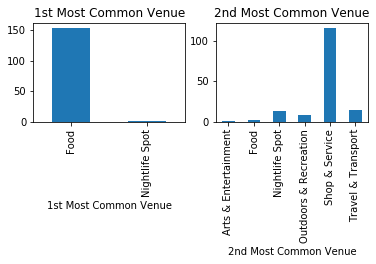

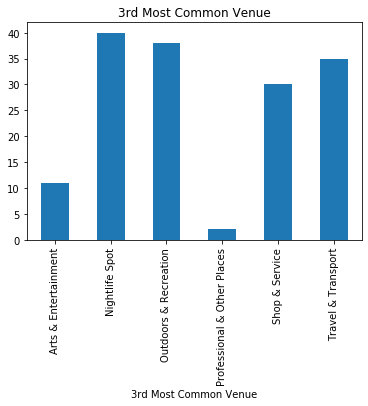

In [253]:
Cluster1=Combined_merged.loc[Combined_merged['Cluster Labels'] == 0, Combined_merged.columns[[0]+[1]+[2] + list(range(5, Combined_merged.shape[1]))]]
print(' No of Nieghbourhoods with Cluster label 0:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 0].shape[0])
# print(Cluster1.groupby('1st Most Common Venue').count()['Neighborhood'])
# print(Cluster1.groupby('2nd Most Common Venue').count()['Neighborhood'])
# print(Cluster1.groupby('3rd Most Common Venue').count()['Neighborhood'])

plt.subplot(2,2,1)
Cluster1.groupby('1st Most Common Venue').count()['Neighborhood'].plot.bar(title='1st Most Common Venue')
plt.subplot(2,2,2)
Cluster1.groupby('2nd Most Common Venue').count()['Neighborhood'].plot.bar(title='2nd Most Common Venue')
plt.show()
Cluster1.groupby('3rd Most Common Venue').count()['Neighborhood'].plot.bar(title='3rd Most Common Venue')

### Based on the venues we could classify Cluster 1 as good for people interested in the Outdoors and Recreation with some good mix of eating choies. 

### Cluster 2

 No of Nieghbourhoods with Cluster label 1: 21


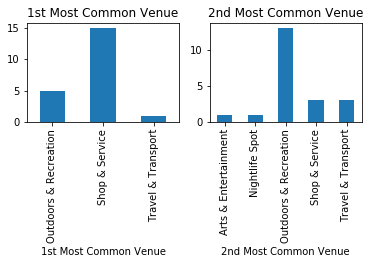

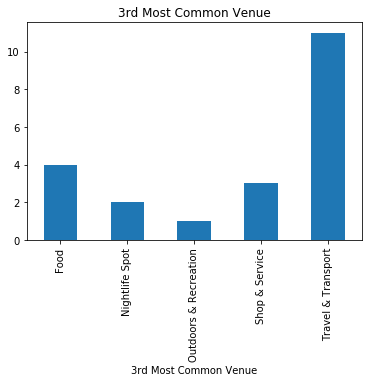

In [250]:
Cluster2=Combined_merged.loc[Combined_merged['Cluster Labels'] == 1, Combined_merged.columns[[0]+[1]+[2] + list(range(5, Combined_merged.shape[1]))]]
print(' No of Nieghbourhoods with Cluster label 1:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 1].shape[0])
# print(Cluster2.groupby('1st Most Common Venue').count()['Neighborhood'])
# print(Cluster2.groupby('2nd Most Common Venue').count()['Neighborhood'])
# print(Cluster2.groupby('3rd Most Common Venue').count()['Neighborhood'])
plt.subplot(2,2,1)
Cluster2.groupby('1st Most Common Venue').count()['Neighborhood'].plot.bar(title='1st Most Common Venue')
plt.subplot(2,2,2)
Cluster2.groupby('2nd Most Common Venue').count()['Neighborhood'].plot.bar(title='2nd Most Common Venue')
plt.show()
Cluster2.groupby('3rd Most Common Venue').count()['Neighborhood'].plot.bar(title='3rd Most Common Venue')

### Cluster 3

 No of Nieghbourhoods with Cluster label 2: 14


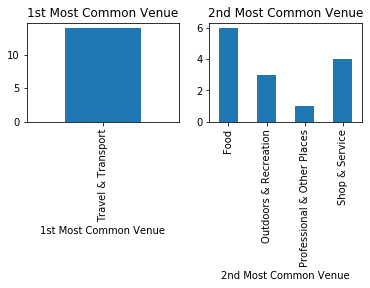

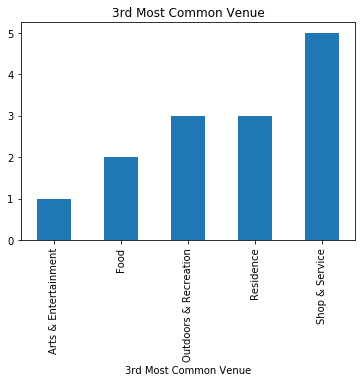

In [251]:
Cluster3=Combined_merged.loc[Combined_merged['Cluster Labels'] == 2, Combined_merged.columns[[0]+[1]+[2] + list(range(5, Combined_merged.shape[1]))]]
print(' No of Nieghbourhoods with Cluster label 2:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 2].shape[0])
# print(Cluster3.groupby('1st Most Common Venue').count()['Neighborhood'])
# print(Cluster3.groupby('2nd Most Common Venue').count()['Neighborhood'])
# print(Cluster3.groupby('3rd Most Common Venue').count()['Neighborhood'])
plt.subplot(2,2,1)
Cluster3.groupby('1st Most Common Venue').count()['Neighborhood'].plot.bar(title='1st Most Common Venue')
plt.subplot(2,2,2)
Cluster3.groupby('2nd Most Common Venue').count()['Neighborhood'].plot.bar(title='2nd Most Common Venue')
plt.show()
Cluster3.groupby('3rd Most Common Venue').count()['Neighborhood'].plot.bar(title='3rd Most Common Venue')

### Cluster 4

 No of Nieghbourhoods with Cluster label 3: 14


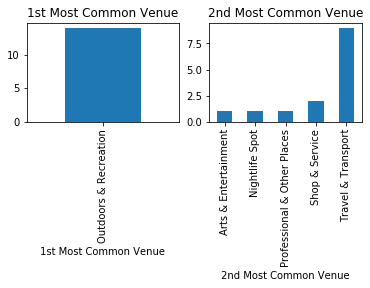

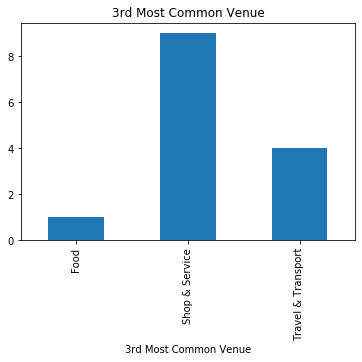

In [252]:
Cluster4=Combined_merged.loc[Combined_merged['Cluster Labels'] == 3, Combined_merged.columns[[0]+[1]+[2] + list(range(5, Combined_merged.shape[1]))]]
print(' No of Nieghbourhoods with Cluster label 3:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 3].shape[0])
# print(Cluster4.groupby('1st Most Common Venue').count()['Neighborhood'])
# print(Cluster4.groupby('2nd Most Common Venue').count()['Neighborhood'])
# print(Cluster4.groupby('3rd Most Common Venue').count()['Neighborhood'])
plt.subplot(2,2,1)
Cluster4.groupby('1st Most Common Venue').count()['Neighborhood'].plot.bar(title='1st Most Common Venue')
plt.subplot(2,2,2)
Cluster4.groupby('2nd Most Common Venue').count()['Neighborhood'].plot.bar(title='2nd Most Common Venue')
plt.show()
Cluster4.groupby('3rd Most Common Venue').count()['Neighborhood'].plot.bar(title='3rd Most Common Venue')

### Cluster 5

 No of Nieghbourhoods with Cluster label 4: 51


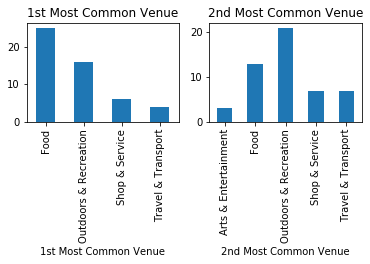

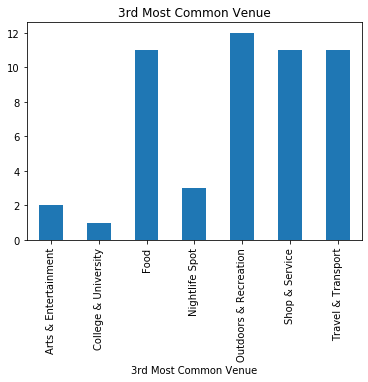

In [254]:
Cluster5=Combined_merged.loc[Combined_merged['Cluster Labels'] == 4, Combined_merged.columns[[0]+[1]+[2] + list(range(5, Combined_merged.shape[1]))]]
print(' No of Nieghbourhoods with Cluster label 4:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 4].shape[0])
# print(Cluster5.groupby('1st Most Common Venue').count()['Neighborhood'])
# print(Cluster5.groupby('2nd Most Common Venue').count()['Neighborhood'])
# print(Cluster5.groupby('3rd Most Common Venue').count()['Neighborhood'])
plt.subplot(2,2,1)
Cluster5.groupby('1st Most Common Venue').count()['Neighborhood'].plot.bar(title='1st Most Common Venue')
plt.subplot(2,2,2)
Cluster5.groupby('2nd Most Common Venue').count()['Neighborhood'].plot.bar(title='2nd Most Common Venue')
plt.show()
Cluster5.groupby('3rd Most Common Venue').count()['Neighborhood'].plot.bar(title='3rd Most Common Venue')

## Cluster 6

 No of Nieghbourhoods with Cluster label 5: 148


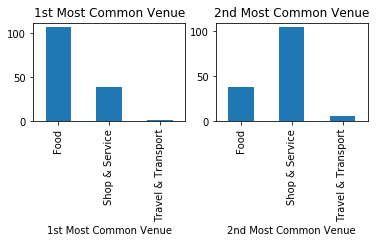

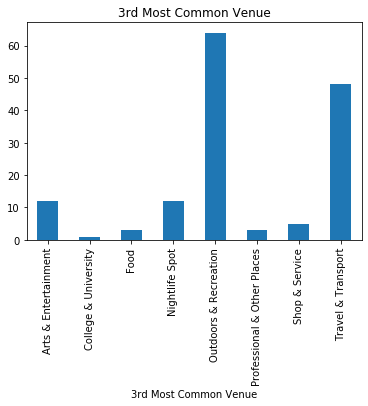

In [256]:
Cluster6=Combined_merged.loc[Combined_merged['Cluster Labels'] == 5, Combined_merged.columns[[0]+[1]+[2] + list(range(5, Combined_merged.shape[1]))]]
print(' No of Nieghbourhoods with Cluster label 5:', Combined_merged.loc[Combined_merged['Cluster Labels'] == 5].shape[0])
# print(Cluster6.groupby('1st Most Common Venue').count()['Neighborhood'])
# print(Cluster6.groupby('2nd Most Common Venue').count()['Neighborhood'])
# print(Cluster6.groupby('3rd Most Common Venue').count()['Neighborhood'])
plt.subplot(2,2,1)
Cluster6.groupby('1st Most Common Venue').count()['Neighborhood'].plot.bar(title='1st Most Common Venue')
plt.subplot(2,2,2)
Cluster6.groupby('2nd Most Common Venue').count()['Neighborhood'].plot.bar(title='2nd Most Common Venue')
plt.show()
Cluster6.groupby('3rd Most Common Venue').count()['Neighborhood'].plot.bar(title='3rd Most Common Venue')

# 6.Results and Discussion <a name="results"></a>

Lets Print out the City and Nighborhood for Each Cluster.

In [274]:

Cluster1.iloc[:,0:3].to_csv('Cluster1.csv')
Cluster1.iloc[:,0:3]

City           Borough  \
4     Toronto  Downtown Toronto   
6     Toronto       Scarborough   
10    Toronto        North York   
15    Toronto  Downtown Toronto   
20    Toronto  Downtown Toronto   
22    Toronto       Scarborough   
24    Toronto  Downtown Toronto   
26    Toronto       Scarborough   
30    Toronto  Downtown Toronto   
37    Toronto      West Toronto   
39    Toronto        North York   
41    Toronto      East Toronto   
42    Toronto  Downtown Toronto   
43    Toronto      West Toronto   
45    Toronto        North York   
47    Toronto      East Toronto   
48    Toronto  Downtown Toronto   
54    Toronto      East Toronto   
55    Toronto        North York   
56    Toronto              York   
59    Toronto        North York   
63    Toronto              York   
65    Toronto       Scarborough   
69    Toronto      West Toronto   
70    Toronto         Etobicoke   
71    Toronto       Scarborough   
74    Toronto   Central Toronto   
75    Toronto      West Toronto   
76    Toronto       Mississauga   
79    Toronto   Central Toronto   
80    Toronto  Downtown Toronto   
81    Toronto      West Toronto   
82    Toronto       Scarborough   
84    Toronto  Downtown Toronto   
86    Toronto   Central Toronto   
88    Toronto         Etobicoke   
92    Toronto  Downtown Toronto   
96    Toronto  Downtown Toronto   
97    Toronto  Downtown Toronto   
99    Toronto  Downtown Toronto   
105  New York             Bronx   
108  New York             Bronx   
110  New York             Bronx   
112  New York             Bronx   
114  New York             Bronx   
116  New York             Bronx   
117  New York             Bronx   
125  New York             Bronx   
126  New York             Bronx   
131  New York             Bronx   
135  New York             Bronx   
136  New York             Bronx   
137  New York             Bronx   
139  New York             Bronx   
141  New York             Bronx   
142  New York             Bronx   
147  New York             Bronx   
149  New York          Brooklyn   
150  New York          Brooklyn   
152  New York          Brooklyn   
155  New York          Brooklyn   
156  New York          Brooklyn   
157  New York          Brooklyn   
162  New York          Brooklyn   
164  New York          Brooklyn   
165  New York          Brooklyn   
166  New York          Brooklyn   
168  New York          Brooklyn   
173  New York          Brooklyn   
174  New York          Brooklyn   
175  New York          Brooklyn   
177  New York          Brooklyn   
182  New York          Brooklyn   
183  New York          Brooklyn   
187  New York          Brooklyn   
189  New York          Brooklyn   
191  New York          Brooklyn   
192  New York          Brooklyn   
198  New York          Brooklyn   
199  New York          Brooklyn   
200  New York          Brooklyn   
202  New York          Brooklyn   
203  New York         Manhattan   
205  New York         Manhattan   
206  New York         Manhattan   
207  New York         Manhattan   
208  New York         Manhattan   
209  New York         Manhattan   
211  New York         Manhattan   
212  New York         Manhattan   
214  New York         Manhattan   
218  New York         Manhattan   
220  New York         Manhattan   
221  New York         Manhattan   
222  New York         Manhattan   
226  New York         Manhattan   
227  New York         Manhattan   
228  New York         Manhattan   
229  New York         Manhattan   
231  New York         Manhattan   
232  New York            Queens   
233  New York            Queens   
234  New York            Queens   
235  New York            Queens   
237  New York            Queens   
241  New York            Queens   
242  New York            Queens   
243  New York            Queens   
248  New York            Queens   
252  New York            Queens   
254  New York            Queens   
256  New York            Queens   
259  New York            Queens   
264  New York      

In [275]:
Cluster2.iloc[:,0:3].to_csv('Cluster2.csv')
Cluster2.iloc[:,0:3]

City        Borough                            Neighborhood
0     Toronto     North York                               Parkwoods
12    Toronto    Scarborough  Rouge Hill, Port Union, Highland Creek
14    Toronto      East York                        Woodbine Heights
19    Toronto   East Toronto                             The Beaches
32    Toronto    Scarborough                     Scarborough Village
40    Toronto     North York                               Downsview
46    Toronto     North York                               Downsview
53    Toronto     North York                               Downsview
57    Toronto     North York                        Humberlea, Emery
60    Toronto     North York                               Downsview
64    Toronto           York                                  Weston
66    Toronto     North York                         York Mills West
106  New York          Bronx                               Fieldston
130  New York          Bronx                            Clason Point
148  New York          Bronx                                Edenwald
179  New York       Brooklyn                             Mill Island
286  New York         Queens                         Jamaica Estates
315  New York  Staten Island                                 Oakwood
358  New York  Staten Island                            Emerson Hill
378  New York      Manhattan                         Stuyvesant Town
406  New York         Queens                               Bayswater

In [276]:
Cluster3.iloc[:,0:3].to_csv('Cluster3.csv')
Cluster3.iloc[:,0:3]

City           Borough  \
35    Toronto         East York   
44    Toronto       Scarborough   
51    Toronto       Scarborough   
61    Toronto   Central Toronto   
87    Toronto  Downtown Toronto   
94    Toronto         Etobicoke   
308  New York     Staten Island   
310  New York     Staten Island   
327  New York     Staten Island   
329  New York     Staten Island   
330  New York     Staten Island   
388  New York     Staten Island   
397  New York            Queens   
408  New York     Staten Island   

                                          Neighborhood  
35       East Toronto, Broadview North (Old East York)  
44                     Golden Mile, Clairlea, Oakridge  
51     Cliffside, Cliffcrest, Scarborough Village West  
61                                       Lawrence Park  
87   CN Tower, King and Spadina, Railway Lands, Har...  
94                 Northwest, West Humber - Clairville  
308                                      Port Richmond  
310                                         Port Ivory  
327                                          Park Hill  
329                                       Graniteville  
330                                          Arlington  
388                                        Willowbrook  
397                                              Malba  
408                                          Fox Hills

In [277]:
Cluster4.iloc[:,0:3].to_csv('Cluster4.csv')
Cluster4.iloc[:,0:3]

City          Borough  \
16    Toronto             York   
21    Toronto             York   
49    Toronto       North York   
83    Toronto  Central Toronto   
85    Toronto      Scarborough   
98    Toronto        Etobicoke   
101   Toronto        Etobicoke   
107  New York            Bronx   
194  New York         Brooklyn   
275  New York           Queens   
282  New York           Queens   
295  New York           Queens   
306  New York    Staten Island   
341  New York    Staten Island   

                                          Neighborhood  
16                                  Humewood-Cedarvale  
21                                 Caledonia-Fairbanks  
49            North Park, Maple Leaf Park, Upwood Park  
83                         Moore Park, Summerhill East  
85   Milliken, Agincourt North, Steeles East, L'Amo...  
98       The Kingsway, Montgomery Road, Old Mill North  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  
107                                          Riverdale  
194                                       Bergen Beach  
275                                       Breezy Point  
282                                           Neponsit  
295                                         Somerville  
306                                          Todt Hill  
341                                       Butler Manor

In [278]:
Cluster5.iloc[:,0:3].to_csv('Cluster5.csv')
Cluster5.iloc[:,0:3]

City           Borough  \
27    Toronto        North York   
36    Toronto  Downtown Toronto   
58    Toronto       Scarborough   
62    Toronto   Central Toronto   
67    Toronto   Central Toronto   
78    Toronto       Scarborough   
93    Toronto         Etobicoke   
100   Toronto      East Toronto   
104  New York             Bronx   
121  New York             Bronx   
132  New York             Bronx   
138  New York             Bronx   
163  New York          Brooklyn   
180  New York          Brooklyn   
181  New York          Brooklyn   
184  New York          Brooklyn   
185  New York          Brooklyn   
186  New York          Brooklyn   
188  New York          Brooklyn   
213  New York         Manhattan   
215  New York         Manhattan   
216  New York         Manhattan   
223  New York         Manhattan   
230  New York         Manhattan   
238  New York            Queens   
251  New York            Queens   
279  New York            Queens   
280  New York            Queens   
291  New York            Queens   
301  New York     Staten Island   
305  New York     Staten Island   
307  New York     Staten Island   
313  New York     Staten Island   
322  New York     Staten Island   
335  New York     Staten Island   
337  New York     Staten Island   
348  New York     Staten Island   
352  New York         Manhattan   
359  New York     Staten Island   
364  New York          Brooklyn   
368  New York            Queens   
369  New York            Queens   
382  New York          Brooklyn   
386  New York          Brooklyn   
389  New York     Staten Island   
391  New York            Queens   
395  New York     Staten Island   
398  New York          Brooklyn   
404  New York         Manhattan   
405  New York            Queens   
407  New York            Queens   

                                          Neighborhood  
27                                   Hillcrest Village  
36   Harbourfront East, Union Station, Toronto Islands  
58                         Birch Cliff, Cliffside West  
62                                            Roselawn  
67                                    Davisville North  
78                                           Agincourt  
93                              Alderwood, Long Branch  
100  Business reply mail Processing Centre, South C...  
104                                         Co-op City  
121                                         West Farms  
132                                       Country Club  
138                                     Spuyten Duyvil  
163                                        Brownsville  
180                                    Manhattan Beach  
181                                       Coney Island  
184                                      Dyker Heights  
185                                    Gerritsen Beach  
186                                        Marine Park  
188                                           Sea Gate  
213                                   Roosevelt Island  
215                                     Lincoln Square  
216                                            Clinton  
223                                            Tribeca  
230                                  Battery Park City  
238                                       Forest Hills  
251                                   South Ozone Park  
279                                           Edgemere  
280                                            Arverne  
291                                          Laurelton  
301                                       New Brighton  
305                                        Grymes Hill  
307                                        South Beach  
313                                             Travis  
322                                        Silver Lake  
335                                      Midland Beach  
337                                     New Dorp Beach  
348                                         Bloomfield  
352                   

In [279]:

Cluster6.iloc[:,0:3].to_csv('Cluster6.csv')
Cluster6.iloc[:,0:3]

City           Borough  \
1     Toronto        North York   
2     Toronto  Downtown Toronto   
3     Toronto        North York   
7     Toronto        North York   
8     Toronto         East York   
9     Toronto  Downtown Toronto   
13    Toronto        North York   
17    Toronto         Etobicoke   
18    Toronto       Scarborough   
23    Toronto         East York   
25    Toronto  Downtown Toronto   
28    Toronto        North York   
29    Toronto         East York   
31    Toronto      West Toronto   
33    Toronto        North York   
34    Toronto        North York   
38    Toronto       Scarborough   
50    Toronto        North York   
68    Toronto   Central Toronto   
72    Toronto        North York   
73    Toronto   Central Toronto   
77    Toronto         Etobicoke   
89    Toronto         Etobicoke   
90    Toronto       Scarborough   
91    Toronto  Downtown Toronto   
102   Toronto         Etobicoke   
103  New York             Bronx   
109  New York         Manhattan   
111  New York             Bronx   
113  New York             Bronx   
115  New York             Bronx   
118  New York             Bronx   
119  New York             Bronx   
120  New York             Bronx   
122  New York             Bronx   
123  New York             Bronx   
124  New York             Bronx   
127  New York             Bronx   
128  New York             Bronx   
129  New York             Bronx   
133  New York             Bronx   
134  New York             Bronx   
140  New York             Bronx   
143  New York             Bronx   
144  New York             Bronx   
145  New York             Bronx   
146  New York             Bronx   
151  New York          Brooklyn   
153  New York          Brooklyn   
154  New York          Brooklyn   
158  New York          Brooklyn   
159  New York          Brooklyn   
160  New York          Brooklyn   
161  New York          Brooklyn   
167  New York          Brooklyn   
169  New York          Brooklyn   
170  New York          Brooklyn   
171  New York          Brooklyn   
172  New York          Brooklyn   
176  New York          Brooklyn   
178  New York          Brooklyn   
190  New York          Brooklyn   
193  New York          Brooklyn   
195  New York          Brooklyn   
196  New York          Brooklyn   
197  New York          Brooklyn   
201  New York          Brooklyn   
204  New York         Manhattan   
210  New York         Manhattan   
217  New York         Manhattan   
219  New York         Manhattan   
224  New York         Manhattan   
225  New York         Manhattan   
236  New York            Queens   
239  New York            Queens   
240  New York            Queens   
244  New York            Queens   
245  New York            Queens   
246  New York            Queens   
247  New York            Queens   
249  New York            Queens   
250  New York            Queens   
253  New York            Queens   
255  New York            Queens   
257  New York            Queens   
258  New York            Queens   
260  New York            Queens   
261  New York            Queens   
262  New York            Queens   
263  New York            Queens   
265  New York            Queens   
266  New York            Queens   
267  New York            Queens   
269  New York            Queens   
270  New York            Queens   
271  New York            Queens   
272  New York            Queens   
273  New York            Queens   
276  New York            Queens   
277  New York            Queens   
278  New York            Queens   
284  New York            Queens   
285  New York            Queens   
287  New York            Queens   
288  New York            Queens   
290  New York            Queens   
292  New York            Queens   
293  New York            Queens   
294  New York            Queens   
299  New York            Queens   
300  New York     Staten Island   
303  New York     Staten Island   
311  New York     Staten Island   
312  New York     S

# 7. Conclusion <a name="conclusion"></a>


We used the number and type of venues to come up with similar neighborhoods between the cities of Toronto and New York. This allows us to get a good idea of which neighborhoods would have a similar feel in a new city. This can be further expanded in the future by adding rental rates, property prices walkscore etc.
